# 第 4 章第 2 节-使用 $k$ 近邻算法进行回归

+ $k$ 近邻算法在连续区间内对数值进行预测，方法是选取待预测点 $k$ 个最近的邻居，用它们的平均值作为待预测点的回归结果。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

生成训练样本。

In [2]:
n_dots = 40
# from a uniform distribution over ``[0, 1)``
X = 5 * np.random.rand(n_dots, 1)
y = np.cos(X).ravel()  # 拉平
# 添加一些噪声
y += 0.2 * np.random.rand(n_dots) - 0.1

可视化。

In [3]:
X.shape

(40, 1)

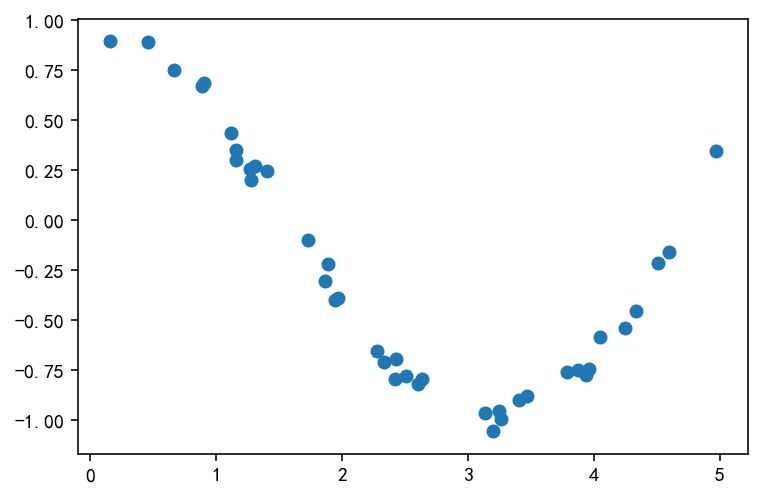

In [4]:
plt.scatter(X, y)
plt.show()

训练模型。

In [5]:
from sklearn.neighbors import KNeighborsRegressor

k = 5
knn = KNeighborsRegressor(k)
knn.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

生成足够密集的点并进行预测。

In [6]:
# [:, np.newaxis] 行向量变成列向量了
T = np.linspace(0, 5, 500)[:, np.newaxis]
y_pred = knn.predict(T)
knn.score(X, y)

0.9624232642653682

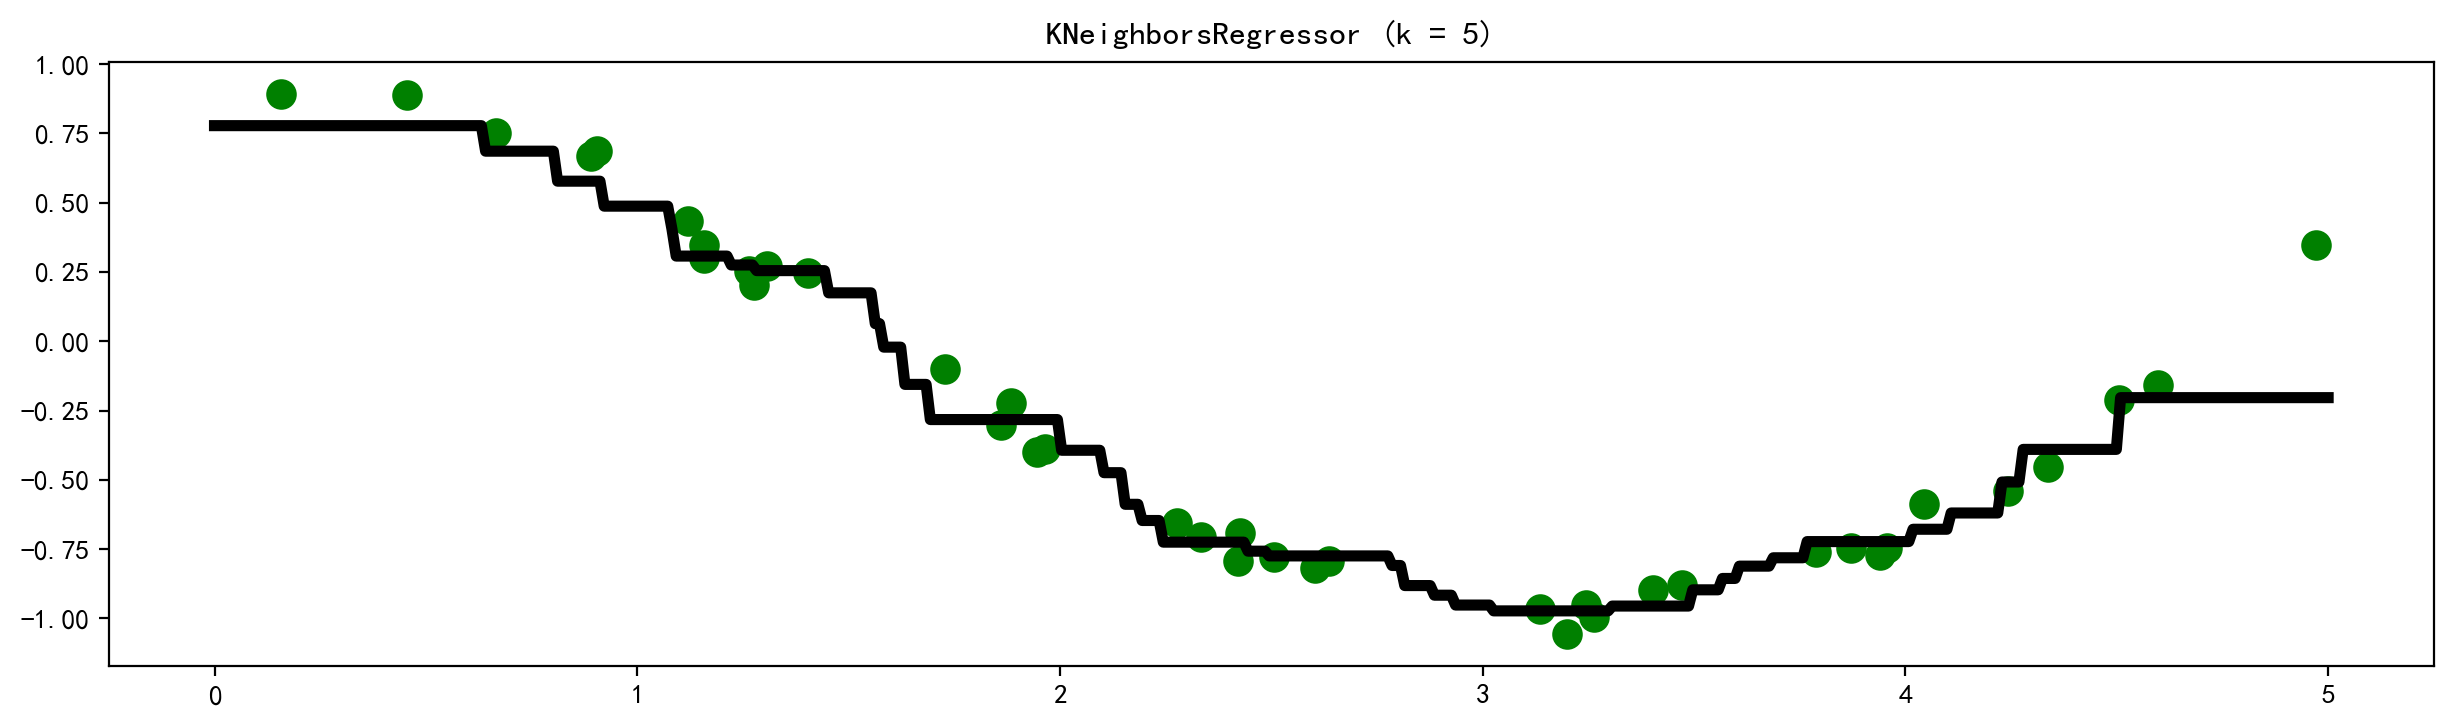

In [7]:
plt.figure(figsize=(15, 4), dpi=100)
# 画出训练样本
plt.scatter(X, y, c='g', label='data', s=100)
# 画出拟合曲线
plt.plot(T, y_pred, c='k', label='prediction', lw=4)
# 修改 x、y 坐标的范围让所有的数据显示出来
plt.axis('tight')
plt.title("KNeighborsRegressor (k = {})".format(k))
plt.show()